## Image representation

Images are mostly stored as rgb values between 0 and 255. The reason behind this is that therefore each color value can be stored as one byte  (8bit). With 8 bit binary representation there is a range between 0 and 255 as you have `2**8 = 256` possibilities as there are three color channels this results in `256**3=16777216` colors. Each color channel can be accessed as you see below. Further information on color representations and image formats can be found here: 
- https://www.w3schools.com/colors/colors_rgb.asp 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# create red, green and blue colormaps
from matplotlib.colors import ListedColormap

from src.utils.load_data import mnist
from src.utils.plot import plot_examples

%config InlineBackend.figure_format = "retina"

In [14]:
N = 256
red = np.ones((N, 4))
red[:, 0] = np.linspace(start=0, stop=1, num=N)  # R = 255
red[:, 1] = np.linspace(start=0, stop=0, num=N)  # G = 232
red[:, 2] = np.linspace(start=0, stop=0, num=N)  # B = 11
red_cmap = ListedColormap(red)
# to get the green mapping we just swap the columns
green = red.copy()
green[:, [1, 0]] = green[:, [0, 1]]
green_cmap = ListedColormap(green)
blue = red.copy()
blue[:, [2, 0]] = blue[:, [0, 2]]
blue_cmap = ListedColormap(blue)

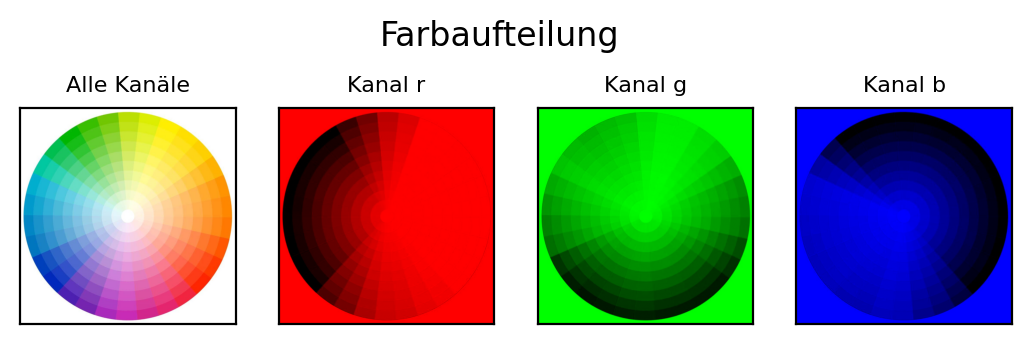

In [15]:
farbkreis = plt.imread("./data/farbkreis.jpg")
fig, ax = plt.subplots(1, 4)
ax[0].imshow(farbkreis)
ax[0].set_title("Alle Kanäle", fontsize=8)
ax[0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[1].imshow(farbkreis[:, :, 0], cmap=red_cmap)
ax[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[1].set_title("Kanal r", fontsize=8)
ax[2].imshow(farbkreis[:, :, 1], cmap=green_cmap)
ax[2].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[2].set_title("Kanal g", fontsize=8)
ax[3].imshow(farbkreis[:, :, 2], cmap=blue_cmap)
ax[3].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[3].set_title("Kanal b", fontsize=8)
plt.suptitle("Farbaufteilung", y=0.7)
plt.show()

In [16]:
# shows a slice of the numerical color values of the image above
farbkreis = plt.imread("./data/farbkreis.jpg")
print(f"shape farbkreis: {farbkreis.shape}")
farbkreis[10:25, 499:500, :]

shape farbkreis: (1000, 1000, 3)


array([[[255, 255, 255]],

       [[255, 255, 255]],

       [[255, 255, 255]],

       [[255, 255, 255]],

       [[255, 255, 255]],

       [[255, 255, 248]],

       [[255, 255, 236]],

       [[251, 255, 203]],

       [[222, 240, 130]],

       [[190, 215,  59]],

       [[183, 215,  18]],

       [[188, 224,   4]],

       [[188, 224,   2]],

       [[188, 224,   4]],

       [[187, 222,   8]]], dtype=uint8)

Dataset MNIST
    Number of datapoints     
    Train:  60000
    Test:   10000
    Source: https://ossci-datasets.s3.amazonaws.com/mnist/



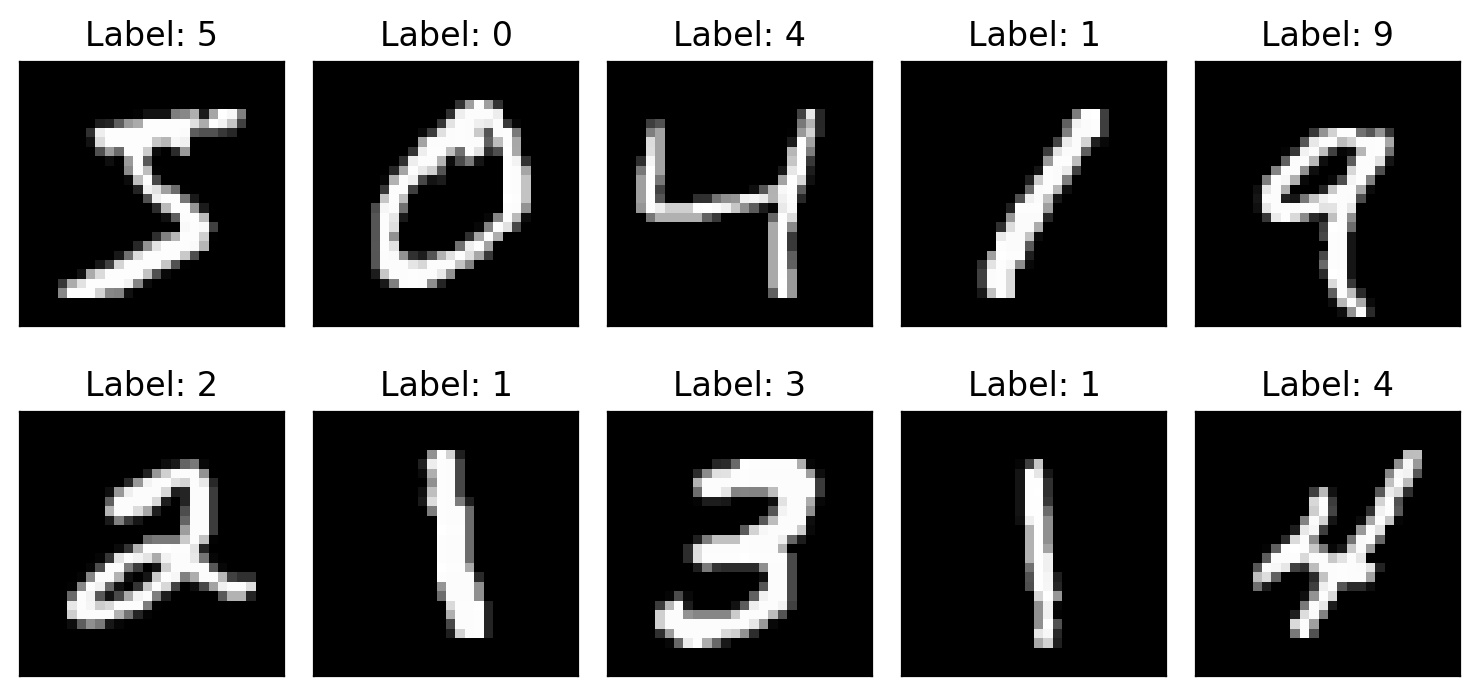

In [17]:
train_images, train_labels, test_images, test_labels = mnist()

plot_examples(train_images, train_labels)

In [18]:
# following we see the numeric values per pixel of the image

with np.printoptions(threshold=np.inf, linewidth=np.inf):
    print(np.asarray(train_images[4].astype(np.int16)))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

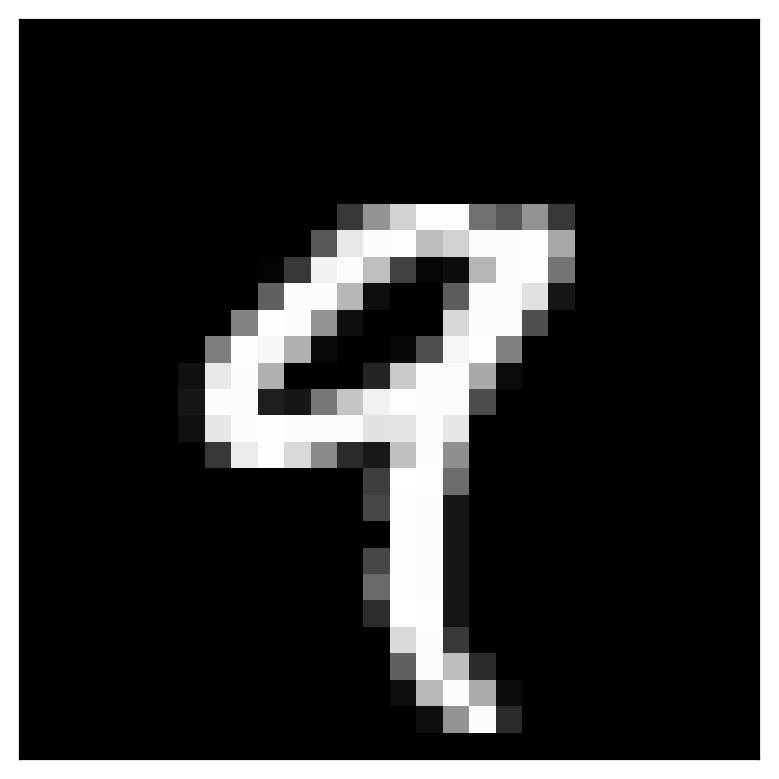

In [19]:
plt.imshow(np.asarray(train_images[4]), cmap="gray")
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.show()

### Matrixmultiplication
<img src="./data/matmul.png" alt="image" width="700" height="auto">  

The matrix multiplication is an important operation in image processing as well as in deep learning. Therefore we will have a look at some properties of the matrix multiplication in the following and demonstrate as well the capabilities of it. 

#### Rowwise / columnwise sums

In [8]:
with np.printoptions(threshold=np.inf, linewidth=np.inf):
    # print(np.identity(28))
    b = np.ones(28).astype(int)
    print(f"b = {b}")
    print("\nb x image = column wise sums")
    print(np.matmul(b, np.asarray(train_images[4])).astype(int))
    print("\nimage x b = row wise sums")
    print(np.matmul(np.asarray(train_images[4]), b).astype(int))

b = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

b x image = column wise sums
[   0    0    0    0    0    0   54  896 1376 1312 1228 1245 1227 1486 3259 3749 2762 2014 1288  958  360    0    0    0    0    0    0    0]

image x b = row wise sums
[   0    0    0    0    0    0    0 1322 2148 1630 1639 1595 1524 1597 1968 2444 1551  679  597  526  597  632  574  526  579  631  455    0]


#### Mirroring

In [9]:
with np.printoptions(threshold=np.inf, linewidth=np.inf):
    # print(np.identity(28))
    b = np.fliplr(
        np.diag(
            np.ones(
                28,
            )
        ).astype(int)
    )
    # A = np.array([[np.cos(np.radians(deg)), -np.sin(np.radians(deg))],[np.sin(np.radians(deg)),np.cos(np.radians(deg))]])
    print(b)
    print(np.matmul(np.asarray(train_images[4]), b).astype(int))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

#### removing "noise" with inverse matrix

following we see the outcome of a matrix multiplication with an inverse matrix to illustrate the power of the matrix multiplication.

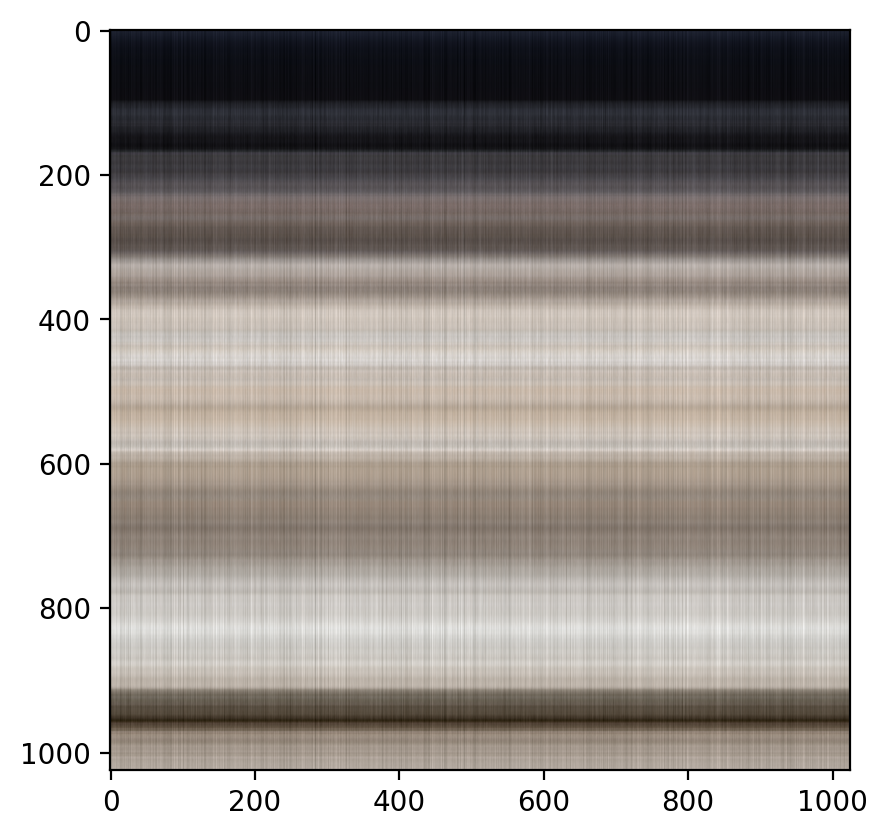

In [10]:
A = plt.imread("./data/Surprise.jpg")
B = np.random.randint(2, size=(A.shape[:-1]))

image_with_noise_r = A[:, :, 0].dot(B)
image_with_noise_g = A[:, :, 1].dot(B)
image_with_noise_b = A[:, :, 2].dot(B)


def normalize(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    scaled_matrix = (matrix - min_val) / (max_val - min_val)
    return scaled_matrix


plt.imshow(
    np.stack(
        [
            normalize(image_with_noise_r),
            normalize(image_with_noise_g),
            normalize(image_with_noise_b),
        ],
        axis=2,
    )
)
plt.show()

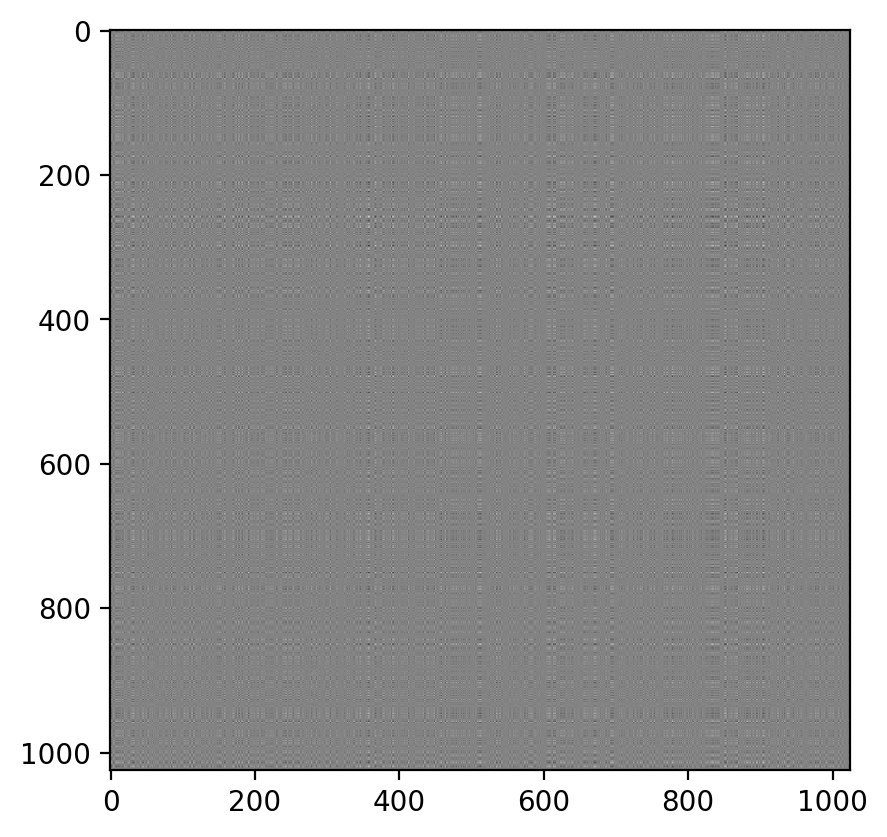

In [11]:
noise_inverse_aka_weight = np.linalg.inv(B)
plt.imshow(noise_inverse_aka_weight, cmap="binary")
plt.show()

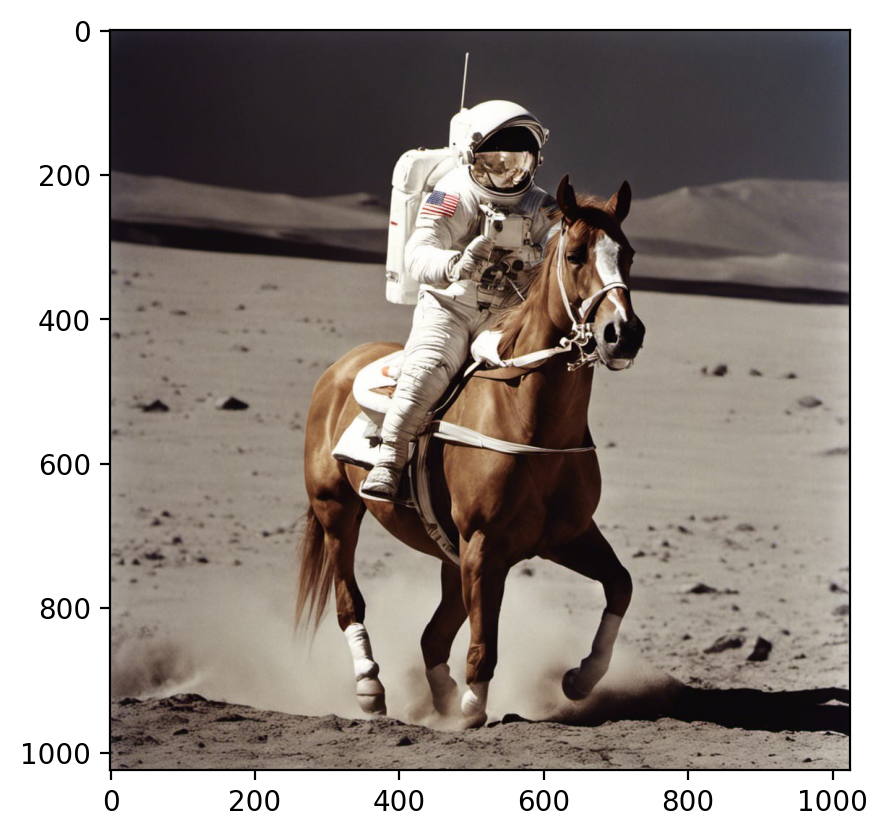

In [12]:
recreated_image_r = np.matmul(image_with_noise_r, noise_inverse_aka_weight)
recreated_image_g = np.matmul(image_with_noise_g, noise_inverse_aka_weight)
recreated_image_b = np.matmul(image_with_noise_b, noise_inverse_aka_weight)
plt.imshow(
    np.stack(
        [
            normalize(recreated_image_r),
            normalize(recreated_image_g),
            normalize(recreated_image_b),
        ],
        axis=2,
    )
)
plt.show()